In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OrdinalEncoder
from sklearn.metrics import mean_absolute_percentage_error, r2_score, mean_absolute_error, precision
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import L2

import warnings
warnings.filterwarnings("ignore")



In [ ]:
df = pd.read_csv("Vehicles.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [ ]:
# Remove the units and make column numeric

df['mileage'] = df['mileage'].str.replace(" km/kg", '', regex=False)
df['mileage'] = df['mileage'].str.replace(" kmpl", '', regex=False)
df['mileage'] = pd.to_numeric(df['mileage'], errors='coerce')

df['max_power'] = df['max_power'].str.replace(" bhp", "", regex=False)
df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce')

df['engine'] = df['engine'].str.replace(" CC", "", regex=False)
df['engine'] = pd.to_numeric(df['engine'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   float64
 9   engine         7907 non-null   float64
 10  max_power      7912 non-null   float64
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 825.6+ KB


In [ ]:
# TACKLE MISSING VALUES

df['mileage'].fillna(df['mileage'].mean(), inplace=True)
df['engine'].fillna(df['engine'].mean(), inplace=True)
df['max_power'].fillna(df['max_power'].mean(), inplace=True)
df['seats'].fillna(df['seats'].mean(), inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        8128 non-null   float64
 9   engine         8128 non-null   float64
 10  max_power      8128 non-null   float64
 11  torque         7906 non-null   object 
 12  seats          8128 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 825.6+ KB


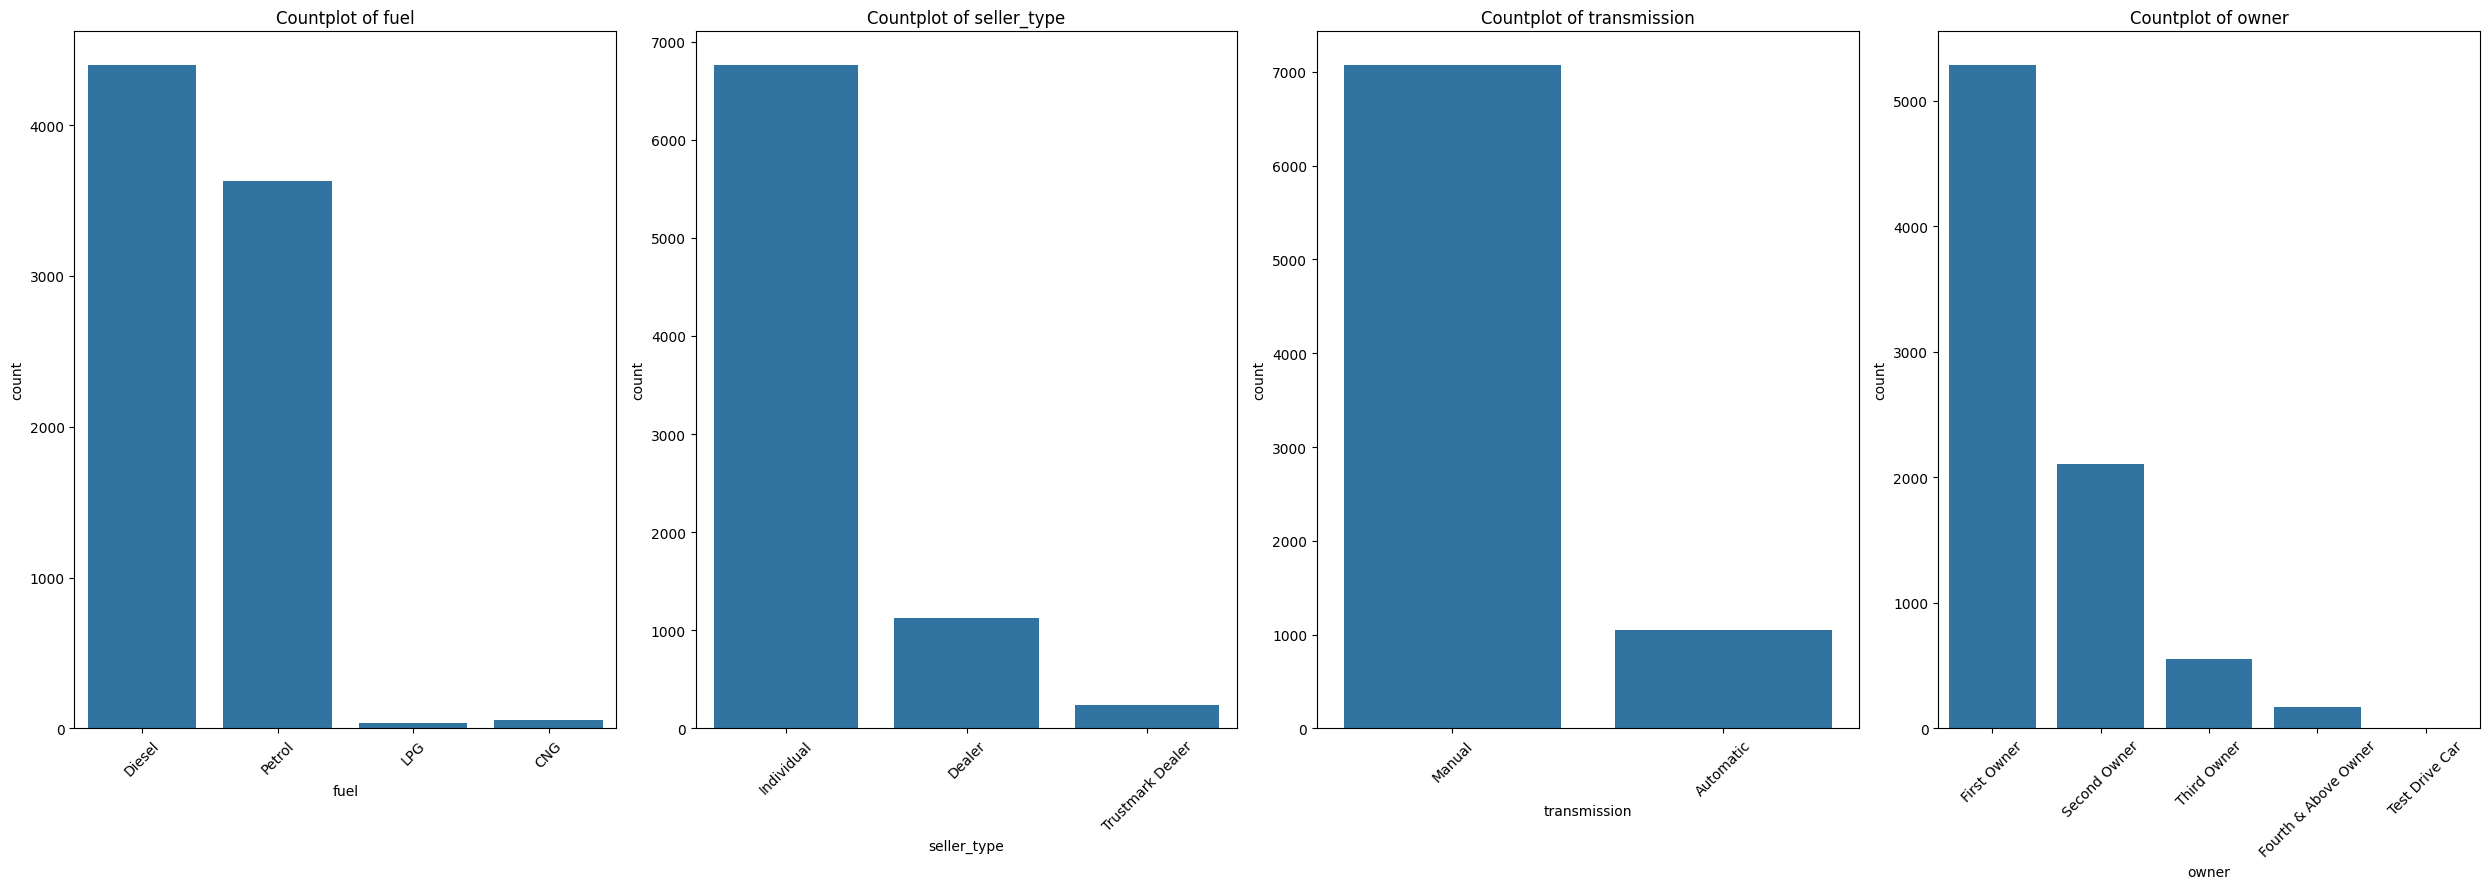

In [ ]:
cat_columns = ['fuel', 'seller_type', 'transmission', 'owner' ]

plt.figure(figsize=(25,9))

for i, col in enumerate(cat_columns, 1):
  plt.subplot(1, len(cat_columns), i)
  sns.countplot(data=df, x=col)
  plt.title(f"Countplot of {col}")
  plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

In [ ]:
# Drop torque column as it is noisy

df.drop(columns=['torque'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        8128 non-null   float64
 9   engine         8128 non-null   float64
 10  max_power      8128 non-null   float64
 11  seats          8128 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 762.1+ KB


In [ ]:
df['brand'] = df['name'].str.split().str[0]
df['model'] = df['name'].str.split().str[1]

In [ ]:
df=df.drop(columns=['name'])



 fuel
Diesel    791452.921627
Petrol    462441.061691
CNG       301017.491228
LPG       200421.052632
Name: selling_price, dtype: float64


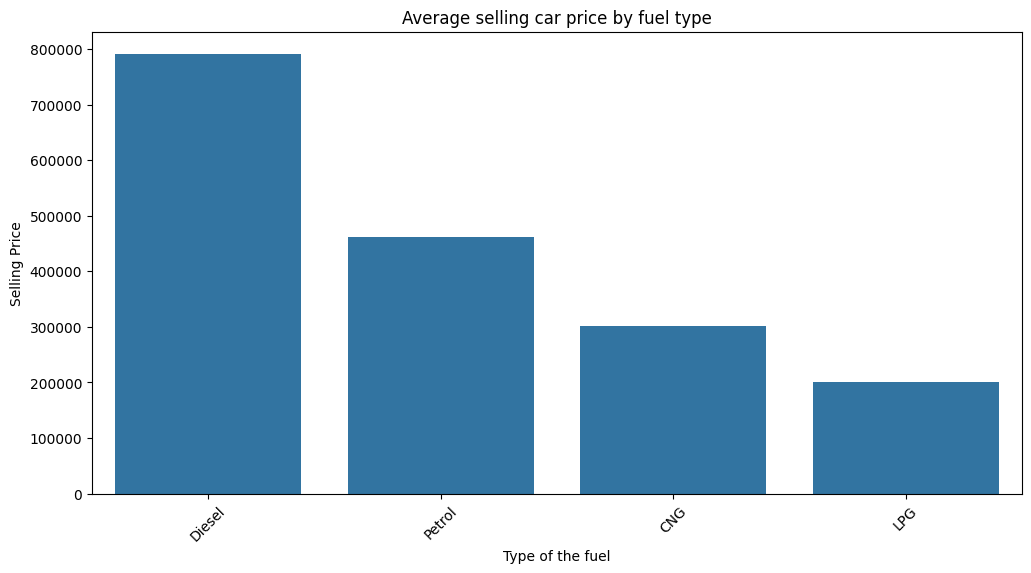

In [ ]:
fuelprice = df.groupby('fuel')['selling_price'].mean().sort_values(ascending=False)
print("\n", fuelprice)
plt.figure(figsize=(12,6))
sns.barplot(x=fuelprice.index, y=fuelprice.values)
plt.xticks(rotation=45)
plt.title("Average selling car price by fuel type")
plt.ylabel("Selling Price")
plt.xlabel("Type of the fuel")
plt.show()

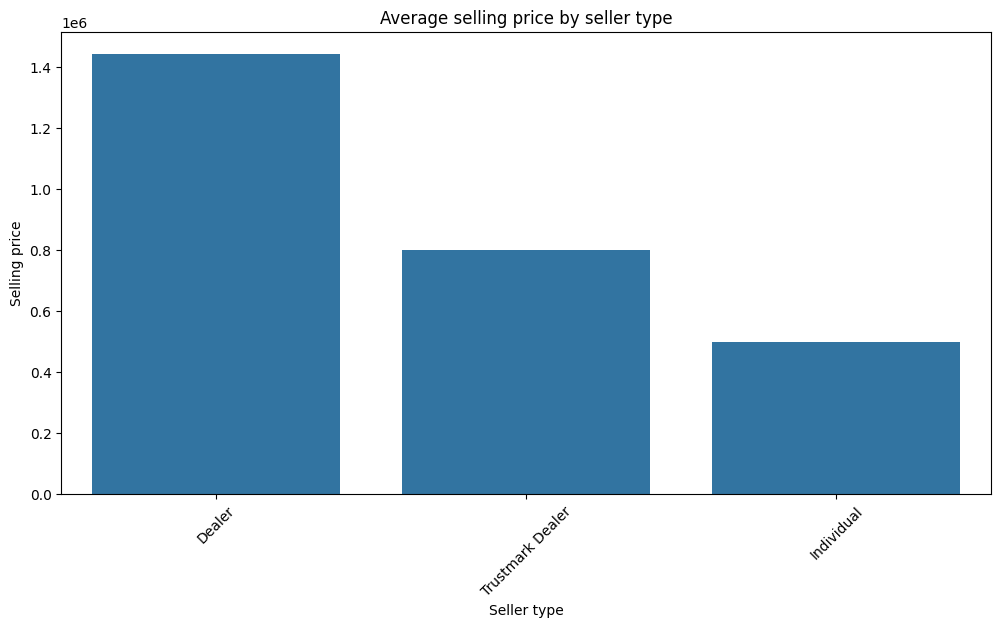

In [ ]:
sellerprice = df.groupby('seller_type')['selling_price'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=sellerprice.index, y=sellerprice.values)
plt.xticks(rotation=45)
plt.title("Average selling price by seller type")
plt.xlabel("Seller type")
plt.ylabel("Selling price")
plt.show()

In [ ]:
# Specifying the order and then encoding the cat columns

brand_order = df.groupby('brand')['selling_price'].mean().sort_values().index.tolist()
model_order = df.groupby('model')['selling_price'].mean().sort_values().index.tolist()
fuel_order = df.groupby('fuel')['selling_price'].mean().sort_values().index.tolist()
seller_order = df.groupby('seller_type')['selling_price'].mean().sort_values().index.tolist()
owner_order = df.groupby('owner')['selling_price'].mean().sort_values().index.tolist()
transmission_order = df.groupby('transmission')['selling_price'].mean().sort_values().index.tolist()
custom_categories = [brand_order, model_order, fuel_order, seller_order, transmission_order, owner_order ]

ordinal_cols = ['brand', 'model', 'fuel', 'seller_type','transmission','owner']
encoder = OrdinalEncoder(categories=custom_categories)
df[ordinal_cols] = encoder.fit_transform(df[ordinal_cols])

In [ ]:
#Printing the encoded value associated with each category

ordinal_cols = ['brand', 'model', 'fuel', 'seller_type','transmission','owner']
for col, categories in zip(ordinal_cols, encoder.categories_):
  print(f"Column: {col}")
  for i, category in enumerate(categories):
    print(f"{category} -> {i}")

Column: brand
Peugeot -> 0
Opel -> 1
Daewoo -> 2
Ambassador -> 3
Chevrolet -> 4
Fiat -> 5
Ashok -> 6
Datsun -> 7
Tata -> 8
Maruti -> 9
Hyundai -> 10
Renault -> 11
Nissan -> 12
Volkswagen -> 13
Ford -> 14
Honda -> 15
Skoda -> 16
Mahindra -> 17
Mitsubishi -> 18
Force -> 19
Toyota -> 20
Kia -> 21
MG -> 22
Isuzu -> 23
Jeep -> 24
Mercedes-Benz -> 25
Audi -> 26
Jaguar -> 27
Volvo -> 28
Land -> 29
BMW -> 30
Lexus -> 31
Column: model
309 -> 0
Astra -> 1
800 -> 2
Palio -> 3
CLASSIC -> 4
Matiz -> 5
Estate -> 6
Esteem -> 7
Nano -> 8
Spacio -> 9
Getz -> 10
Aveo -> 11
Spark -> 12
Zen -> 13
Fusion -> 14
Accent -> 15
Ikon -> 16
Marshal -> 17
Indica -> 18
Lancer -> 19
Omni -> 20
Renault -> 21
Estilo -> 22
Premio -> 23
Beat -> 24
Qualis -> 25
Santro -> 26
Jeep -> 27
Logan -> 28
Indigo -> 29
A-Star -> 30
Alto -> 31
Venture -> 32
Punto -> 33
Manza -> 34
Winger -> 35
i10 -> 36
Fabia -> 37
EON -> 38
Laura -> 39
Wagon -> 40
Fiesta -> 41
Optra -> 42
RediGO -> 43
Ritz -> 44
Sumo -> 45
Verito -> 46
Pulse -> 47

In [ ]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand,model
0,2014,450000,145500,3.0,0.0,0.0,3.0,23.40,1248.0,74.00,5.0,9.0,86.0
1,2014,370000,120000,3.0,0.0,0.0,2.0,21.14,1498.0,103.52,5.0,16.0,103.0
2,2006,158000,140000,2.0,0.0,0.0,1.0,17.70,1497.0,78.00,5.0,15.0,97.0
3,2010,225000,127000,3.0,0.0,0.0,3.0,23.00,1396.0,90.00,5.0,10.0,91.0
4,2007,130000,120000,2.0,0.0,0.0,3.0,16.10,1298.0,88.20,5.0,9.0,86.0


<Axes: >

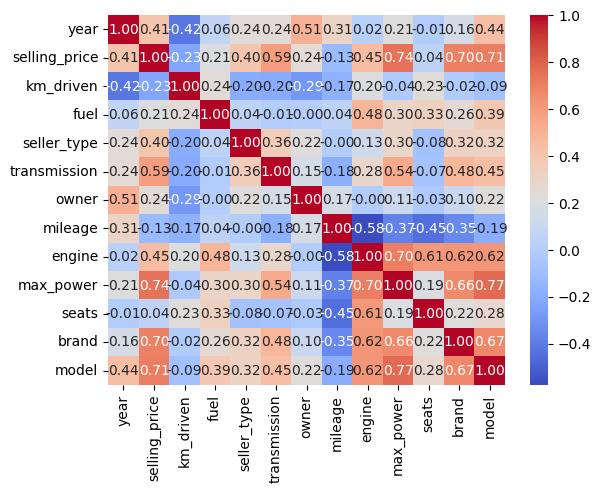

In [ ]:
dfcorr = df.corr()
sns.heatmap(dfcorr, annot=True, fmt=".2f", cmap='coolwarm')

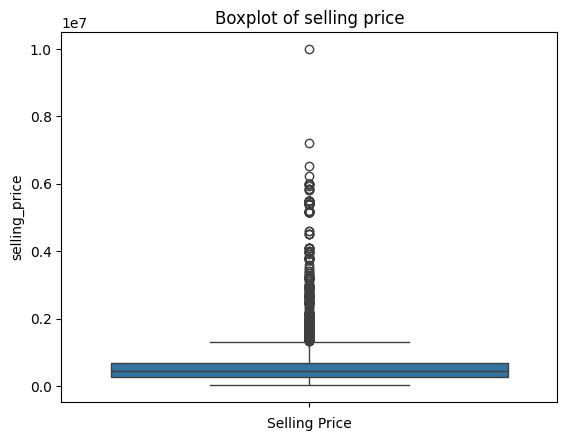

In [ ]:

sns.boxplot(df['selling_price'])

plt.title("Boxplot of selling price")
plt.xlabel("Selling Price")
plt.show()

In [ ]:
X = df.drop(columns=['selling_price'])
y = df['selling_price']

In [ ]:
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_, y_, test_size=0.5, random_state=42)
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((4876, 12), (1626, 12), (1626, 12), (4876,), (1626,), (1626,))

In [ ]:
#Feature Scaling:
sc= StandardScaler()
Xtrain_scaled = sc.fit_transform(X_train)
Xval_scaled = sc.transform(X_val)
Xtest_scaled = sc.transform(X_test)

In [ ]:
linreg = LinearRegression()
linreg.fit(Xtrain_scaled, y_train)

LinearRegression()

In [ ]:
ytrain_linreg = linreg.predict(Xtrain_scaled)
yval_linreg = linreg.predict(Xval_scaled)
ytest_linreg = linreg.predict(Xtest_scaled)

In [ ]:
print(f"mse_train = {mean_absolute_percentage_error(y_train, ytrain_linreg)}")
print(f"mse_val = {mean_absolute_percentage_error(y_val, yval_linreg)}")
print(f"mse_test = {mean_absolute_percentage_error(y_test, ytest_linreg)}")

mse_train = 0.7483088119204665
mse_val = 0.724709893015031
mse_test = 0.6979419077693991


In [ ]:
print(f"r2 score = {r2_score(y_train, ytrain_linreg)}")
print(f"r2 score = {r2_score(y_val, yval_linreg)}")
print(f"r2 score = {r2_score(y_test, ytest_linreg)}")

r2 score = 0.7354354758380964
r2 score = 0.7261622083558328
r2 score = 0.7456488568378903


In [ ]:
rf = RandomForestRegressor(random_state=42)
rf.fit(Xtrain_scaled, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
ytrain_rf = rf.predict(Xtrain_scaled)
yval_rf = rf.predict(Xval_scaled)
ytest_rf = rf.predict(Xtest_scaled)

In [ ]:
print(f"r2 score = {r2_score(y_train, ytrain_rf)}")
print(f"r2 score = {r2_score(y_val, yval_rf)}")
print(f"r2 score = {r2_score(y_test, ytest_rf)}")

r2 score = 0.9964260709415442
r2 score = 0.9664695678994039
r2 score = 0.9673680395675048


In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestRegressor(random_state=42)
search = RandomizedSearchCV(estimator = rf, param_distributions=param_grid, scoring='neg_mean_absolute_error',n_iter=50, cv=5, verbose=1, random_state=42, n_jobs=-1)
search.fit(Xtrain_scaled, y_train)

print("Best params = ", search.best_params_)
print("Best MAE = ", -search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best params =  {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
Best MAE =  65413.969438944245


In [ ]:
rf = RandomForestRegressor(
    n_estimators=500,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42
)
rf.fit(Xtrain_scaled, y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=500, random_state=42)

In [ ]:
ytrain_rf = rf.predict(Xtrain_scaled)
yval_rf = rf.predict(Xval_scaled)
ytest_rf = rf.predict(Xtest_scaled)

In [ ]:
print(f"mse_train = {mean_absolute_percentage_error(y_train, ytrain_rf)}%")
print(f"mse_val = {mean_absolute_percentage_error(y_val, yval_rf)}%")
print(f"mse_test = {mean_absolute_percentage_error(y_test, ytest_rf)}%")

mse_train = 0.056464167254125695%
mse_val = 0.14777962235388561%
mse_test = 0.1465145437813168%


In [ ]:
print(f"r2 score = {r2_score(y_train, ytrain_rf)}")
print(f"r2 score = {r2_score(y_val, yval_rf)}")
print(f"r2 score = {r2_score(y_test, ytest_rf)}")

r2 score = 0.9964384544013185
r2 score = 0.9687570901258011
r2 score = 0.9582104038826632


In [ ]:
print(f"mse_train = {mean_absolute_error(y_train, ytrain_rf)}")
print(f"mse_val = {mean_absolute_error(y_val, yval_rf)}")
print(f"mse_test = {mean_absolute_error(y_test, ytest_rf)}")

mse_train = 24454.874277243092
mse_val = 69286.358443941
mse_test = 64309.81171291364


<Axes: >

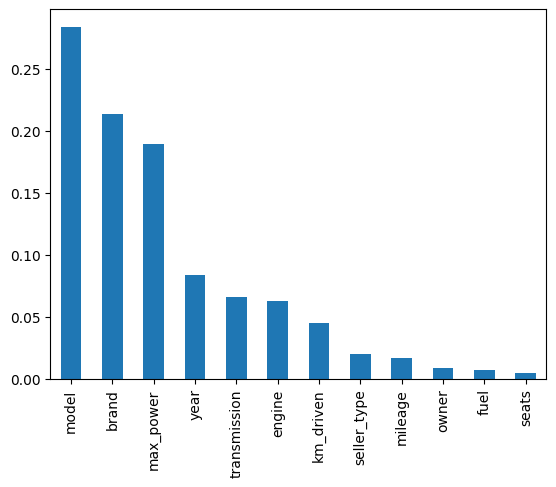

In [ ]:
importances = rf.feature_importances_
forest_importances = pd.Series(importances, index=X.columns)

forest_importances_sorted = forest_importances.sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances_sorted.plot.bar(ax=ax)

In [ ]:
model = Sequential([

    Dense(1024, activation='relu', kernel_regularizer=L2(0.001)),
    Dense(512, activation='relu', kernel_regularizer=L2(0.001)),
    Dense(256, activation='relu', kernel_regularizer=L2(0.001)),
    Dense(128, activation='relu', kernel_regularizer=L2(0.001)),
    Dense(64, activation='relu', kernel_regularizer=L2(0.001)),
    Dense(32, activation='relu', kernel_regularizer=L2(0.001)),
    Dense(1, activation='linear')
])

model.compile(
    loss = 'mean_absolute_error',  # I am using mae in bracket because its not the sklearn mae, its a built in loss of tensorflow
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ['mean_absolute_error']
)

model.fit(
    Xtrain_scaled, y_train,
    epochs = 60, verbose=0
)

In [ ]:
ytrain_dl = model.predict(Xtrain_scaled)
yval_dl = model.predict(Xval_scaled)
ytest_dl = model.predict(Xtest_scaled)

153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
print(f"mse_train = {mean_absolute_percentage_error(y_train, ytrain_dl):.3f}%")
print(f"mse_val = {mean_absolute_percentage_error(y_val, yval_dl):.3f}%")
print(f"mse_test = {mean_absolute_percentage_error(y_test, ytest_dl):.3f}%")

mse_train = 0.134%
mse_val = 0.158%
mse_test = 0.156%


In [ ]:
print(f"r2 score = {r2_score(y_train, ytrain_dl):.3f}")
print(f"r2 score = {r2_score(y_val, yval_dl):.3f}")
print(f"r2 score = {r2_score(y_test, ytest_dl):.3f}")

r2 score = 0.979
r2 score = 0.957
r2 score = 0.948
